In [10]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [11]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US.head()

job_title_short                                     job_title  \
36    Data Analyst                                  Data Analyst   
68    Data Analyst                     Sr. Research Data Analyst   
73    Data Analyst   Entry level / Systems Data Analyst (Remote)   
79    Data Analyst                    Data Analyst/Report Writer   
93    Data Analyst  IT Finance / TBM Data Analyst - Remote | WFH   

      job_location               job_via job_schedule_type  \
36  Des Moines, IA       via Trabajo.org         Full-time   
68   Baltimore, MD      via ZipRecruiter         Full-time   
73        Anywhere          via LinkedIn        Contractor   
79      Austin, TX  via Jobs Trabajo.org         Full-time   
93        Anywhere          via LinkedIn         Full-time   

    job_work_from_home          search_location     job_posted_date  \
36               False  Illinois, United States 2023-11-06 13:01:22   
68               False  New York, United States 2023-03-24 13:01:00   
73                True  Illinois, United States 2023-06-16 13:18:22   
79               False     Texas, United States 2023-08-07 13:18:27   
93                True  New York, United States 2023-06-10 13:00:05   

    job_no_degree_mention  job_health_insurance    job_country salary_rate  \
36                  False                  True  United States        None   
68                  False                 False  United States        None   
73                   True                  True  United States        None   
79                   True                 False  United States        None   
93                  False                 False  United States        None   

    salary_year_avg  salary_hour_avg                             company_name  \
36              NaN              NaN                          Assuredpartners   
68              NaN              NaN                   Johns Hopkins Medicine   
73              NaN              NaN                               Soft Magic   
79              NaN              NaN                           Nesco Resource   
93              NaN              NaN  Get It Recruit - Information Technology   

                                           job_skills  \
36                                               None   
68                                          [r, zoom]   
73                 [word, excel, powerpoint, outlook]   
79                            [sas, sas, word, excel]   
93  [oracle, azure, power bi, excel, word, powerpo...   

                                      job_type_skills  
36                                               None  
68           {'programming': ['r'], 'sync': ['zoom']}  
73  {'analyst_tools': ['word', 'excel', 'powerpoin...  
79  {'analyst_tools': ['sas', 'word', 'excel'], 'p...  
93  {'analyst_tools': ['power bi', 'excel', 'word'...

In [12]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

salary_year_avg job_skills
109          89000.0     python
109          89000.0          r
109          89000.0    alteryx
109          89000.0    tableau
180          90250.0      excel

In [16]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_US)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

skill_percent = 5 

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand

# df_DA_skills.head(10)

skill_count  median_salary  skill_percent
job_skills                                           
sql                2508       91000.00      57.655172
excel              1808       84392.00      41.563218
python             1431       97500.00      32.896552
tableau            1364       92875.00      31.356322
sas                 926       90000.00      21.287356
r                   893       92500.00      20.528736
power bi            838       90000.00      19.264368
powerpoint          462       85000.00      10.620690
word                461       81194.75      10.597701
sql server          286       92500.00       6.574713
oracle              274       96923.75       6.298851
go                  224       90000.00       5.149425

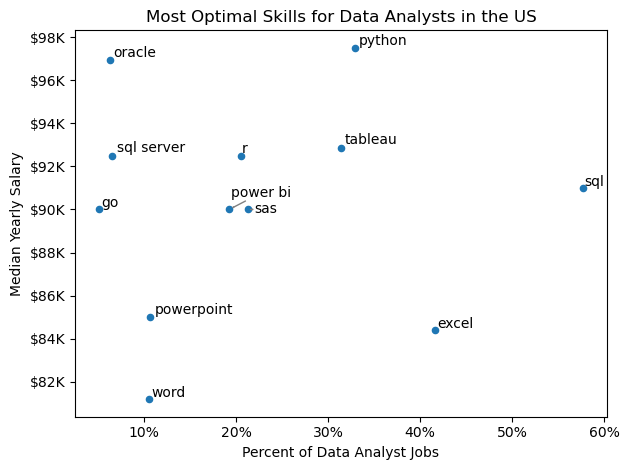

In [31]:


from adjustText import adjust_text


df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')

from matplotlib.ticker import PercentFormatter

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y , pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))


# Adjust layout and display plot 
plt.tight_layout()
plt.show()



In [33]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['msaccess',
  'spss',
  'sharepoint',
  'esquisse',
  'word',
  'datarobot',
  'visio',
  'tableau',
  'outlook',
  'nuix',
  'sheets',
  'microstrategy',
  'cognos',
  'splunk',
  'ms access',
  'ssrs',
  'powerpoint',
  'alteryx',
  'qlik',
  'power bi',
  'sas',
  'looker',
  'powerbi',
  'dax',
  'spreadsheet',
  'excel',
  'sap',
  'ssis'],
 'programming': ['visual basic',
  'solidity',
  'elixir',
  'c',
  'kotlin',
  'objective-c',
  't-sql',
  'delphi',
  'shell',
  'pascal',
  'clojure',
  'nosql',
  'css',
  'visualbasic',
  'lua',
  'groovy',
  'powershell',
  'f#',
  'php',
  'scala',
  'dart',
  'lisp',
  'swift',
  'mongo',
  'html',
  'fortran',
  'vb.net',
  'javascript',
  'rust',
  'java',
  'ocaml',
  'assembly',
  'mongodb',
  'c#',
  'apl',
  'go',
  'python',
  'ruby',
  'sass',
  'julia',
  'golang',
  'no-sql',
  'crystal',
  'sas',
  'perl',
  'r',
  'cobol',
  'erlang',
  'matlab',
  'vba',
  'bash',
  'sql',
  'typescript',
  'haskell',
  '

In [36]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

technology       skills
0   analyst_tools     msaccess
0   analyst_tools         spss
0   analyst_tools   sharepoint
0   analyst_tools     esquisse
0   analyst_tools         word
..            ...          ...
9            sync        unify
9            sync       twilio
9            sync        webex
9            sync  google chat
9            sync   rocketchat

[256 rows x 2 columns]

In [40]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on= 'job_skills', right_on='skills')
df_plot

skill_count  median_salary  skill_percent     technology      skills
0          2508       91000.00      57.655172    programming         sql
1          1808       84392.00      41.563218  analyst_tools       excel
2          1431       97500.00      32.896552    programming      python
3          1364       92875.00      31.356322  analyst_tools     tableau
4           926       90000.00      21.287356  analyst_tools         sas
5           926       90000.00      21.287356    programming         sas
6           893       92500.00      20.528736    programming           r
7           838       90000.00      19.264368  analyst_tools    power bi
8           462       85000.00      10.620690  analyst_tools  powerpoint
9           461       81194.75      10.597701  analyst_tools        word
10          286       92500.00       6.574713      databases  sql server
11          274       96923.75       6.298851          cloud      oracle
12          224       90000.00       5.149425    programming          go

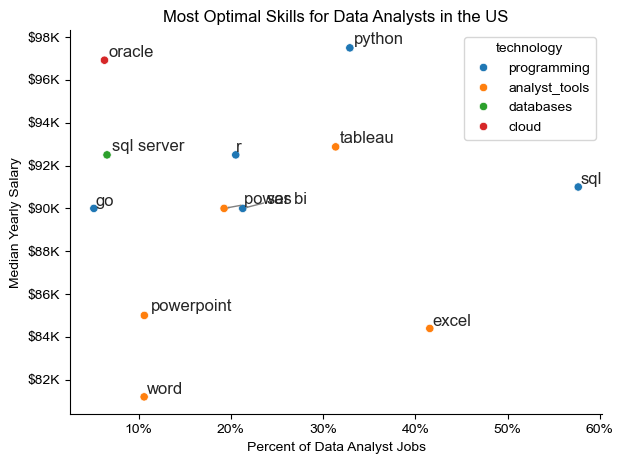

In [43]:
# df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')

sns.scatterplot(
    data=df_plot,
    x="skill_percent",
    y="median_salary",
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')

from matplotlib.ticker import PercentFormatter

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y , pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))


# Adjust layout and display plot 
plt.tight_layout()
plt.show()